<a href="https://colab.research.google.com/github/amnarafique/Django-another/blob/master/Computer_Vision_CNN_Cp_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data

: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-02-03 15:13:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 173.194.210.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   167MB/s    in 0.6s    

2023-02-03 15:13:11 (167 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

NameError: ignored

In [ ]:
!ls pizza_steak


test  train


In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"therr are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

therr are 2 directories and 0 images in pizza_steak
therr are 2 directories and 0 images in pizza_steak/test
therr are 0 directories and 250 images in pizza_steak/test/pizza
therr are 0 directories and 250 images in pizza_steak/test/steak
therr are 2 directories and 0 images in pizza_steak/train
therr are 0 directories and 750 images in pizza_steak/train/pizza
therr are 0 directories and 750 images in pizza_steak/train/steak


In [ ]:
# another way of looking at data

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


## lets visulaize our images

image shape:(288, 512, 3)


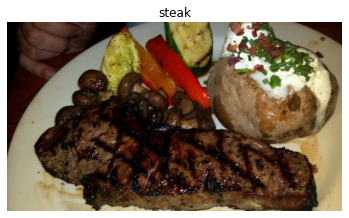

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  #setup the target directory

  target_folder = target_dir + target_class

  # get random image path

  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it using matplot

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape:{img.shape}")
  return img

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")



In [ ]:
img

array([[[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 28,   0,   0],
        [ 29,   1,   0],
        [ 30,   2,   1]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 27,   0,   0],
        [ 27,   0,   0],
        [ 28,   0,   0]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 27,   0,   0],
        [ 28,   0,   0],
        [ 28,   0,   0]],

       ...,

       [[151, 143, 107],
        [155, 147, 111],
        [161, 153, 117],
        ...,
        [207, 184, 134],
        [207, 184, 134],
        [208, 182, 133]],

       [[151, 143, 107],
        [155, 147, 111],
        [161, 153, 117],
        ...,
        [208, 185, 135],
        [208, 185, 135],
        [210, 184, 135]],

       [[151, 143, 107],
        [156, 148, 112],
        [161, 153, 117],
        ...,
        [208, 185, 135],
        [208, 185, 135],
        [210, 184, 135]]

In [ ]:
# converting img into tensor

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(288, 512, 3), dtype=uint8, numpy=
array([[[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 28,   0,   0],
        [ 29,   1,   0],
        [ 30,   2,   1]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 27,   0,   0],
        [ 27,   0,   0],
        [ 28,   0,   0]],

       [[  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 27,   0,   0],
        [ 28,   0,   0],
        [ 28,   0,   0]],

       ...,

       [[151, 143, 107],
        [155, 147, 111],
        [161, 153, 117],
        ...,
        [207, 184, 134],
        [207, 184, 134],
        [208, 182, 133]],

       [[151, 143, 107],
        [155, 147, 111],
        [161, 153, 117],
        ...,
        [208, 185, 135],
        [208, 185, 135],
        [210, 184, 135]],

       [[151, 143, 107],
        [156, 148, 112],
        [161, 153, 117],
        ...,
        [208, 185, 13

## Scaling our Input Data

converting our data bw 0 and 1, simply dividing by 255

In [ ]:
img/255

array([[[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.10980392, 0.        , 0.        ],
        [0.11372549, 0.00392157, 0.        ],
        [0.11764706, 0.00784314, 0.00392157]],

       [[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.10588235, 0.        , 0.        ],
        [0.10588235, 0.        , 0.        ],
        [0.10980392, 0.        , 0.        ]],

       [[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.10588235, 0.        , 0.        ],
        [0.10980392, 0.        , 0.        ],
        [0.10980392, 0.        , 0.        ]],

       ...,

       [[0.59215686, 0.56078431, 0.41960784],
        [0.60784314, 0.57647059, 0.43529412],
        [0.63137255, 0

# lets build our 1xt CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocessing of our data

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

#setup paths to our data directories

train_dir = "/content/pizza_steak/test"
test_dir = "/content/pizza_steak/train"


#importing data from directories and turn them into batches

#train_data = train_datagen.flow_from_directory(train_dir)

train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

#lets now build our CNN model


#01 build a model

model_1 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation="relu",
                                 input_shape=(224,224,3)),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2,
                          padding="valid"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation="sigmoid")
])

#02 comipling data

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#03 fitting our model

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


FileNotFoundError: ignored

# using the same data and build our model in non-CNN way and compare

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
16/16 [==============================] - 9s 573ms/step - loss: 4.5300 - accuracy: 0.5200 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 8s 505ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 10s 624ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 9s 563ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 8s 523ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
16/16 [==============================] - 9s 541ms/step - loss: 7.3885 - accuracy: 0.5020 - val_loss: 6.3331 - val_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 9s 565ms/step - loss: 2.1110 - accuracy: 0.5720 - val_loss: 0.6386 - val_accuracy: 0.7313
Epoch 3/5
16/16 [==============================] - 9s 564ms/step - loss: 0.7542 - accuracy: 0.6940 - val_loss: 0.7164 - val_accuracy: 0.7433
Epoch 4/5
16/16 [==============================] - 8s 509ms/step - loss: 0.5143 - accuracy: 0.8060 - val_loss: 0.6935 - val_accuracy: 0.6747
Epoch 5/5
16/16 [==============================] - 8s 556ms/step - loss: 0.4437 - accuracy: 0.8000 - val_loss: 0.5737 - val_accuracy: 0.7713


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# now lets break  our model down and understand whats going in

image shape:(512, 512, 3)
image shape:(384, 512, 3)


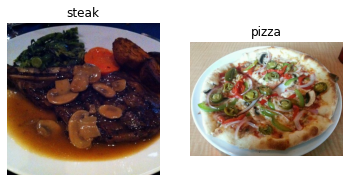

In [ ]:
# Visulaize our data
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
steak_image=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image=view_random_image("pizza_steak/train/","pizza")



In [ ]:

# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:

# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# view our first batch of labels
labels

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

# creating our CNN model (with baseline)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")

])

# lets compile the model

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 1.0039 - accuracy: 0.6753 - val_loss: 0.4436 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4116 - accuracy: 0.8227 - val_loss: 0.3717 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.2684 - accuracy: 0.9027 - val_loss: 0.4023 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.1054 - accuracy: 0.9707 - val_loss: 0.4892 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.0350 - accuracy: 0.9960 - val_loss: 0.6769 - val_accuracy: 0.7920


In [ ]:
# lets check the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Evaluate our model


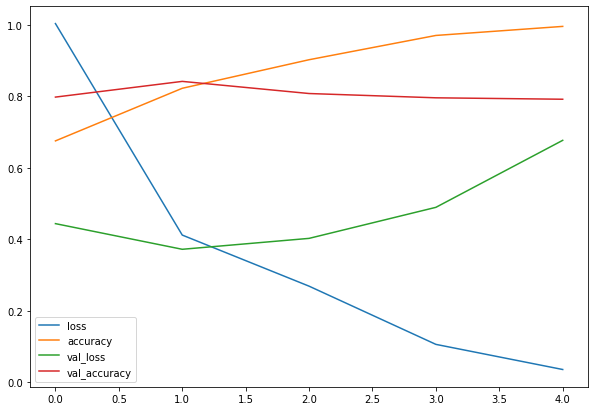

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
#plotting validation and training curves separately

def plot_loss_curves(history):
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]
 accuracy = history.history["accuracy"]
 val_acc = history.history["val_accuracy"]
 epochs = range(len(history.history["loss"]))

 #plot loss
 plt.figure(figsize=(10,7))
 plt.plot(epochs, loss,label="training_loss")
 plt.plot(epochs,val_loss, label="val_loss")
 plt.title("loss")
 plt.xlabel("epochs")
 plt.legend()

 #plot accuracy
 plt.figure(figsize=(10,7))
 plt.plot(epochs, accuracy,label="training_accuracy")
 plt.plot(epochs,val_acc, label="val_accuracy")
 plt.title("accuracy")
 plt.xlabel("epochs")
 plt.legend()


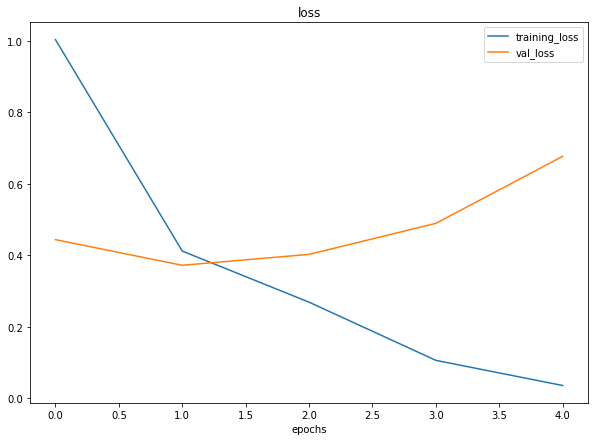

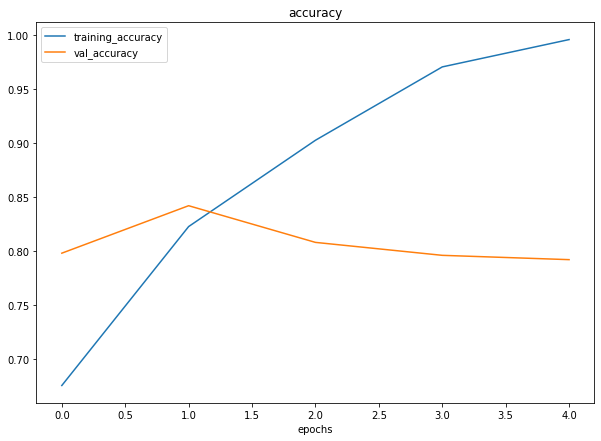

In [ ]:
plot_loss_curves(history_4)

In [ ]:

# our model is overfitting...lets fix this overfitting

#recreate the model with newbaseline model

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#compile the model

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data),
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.5827

47/47 [==============================] - 11s 211ms/step - loss: 0.6728 - accuracy: 0.5827 - val_loss: 0.6222 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.5145 - accuracy: 0.7527
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4153 - accuracy: 0.8167
Epoch 4/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4006 - accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3705 - accuracy: 0.8413


In [ ]:


# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])


# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5685 - accuracy: 0.7213 - val_loss: 0.4178 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4426 - accuracy: 0.7993 - val_loss: 0.3755 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3967 - accuracy: 0.8220 - val_loss: 0.3448 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3730 - accuracy: 0.8373 - val_loss: 0.3213 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3490 - accuracy: 0.8533 - val_loss: 0.3186 - val_accuracy: 0.8660


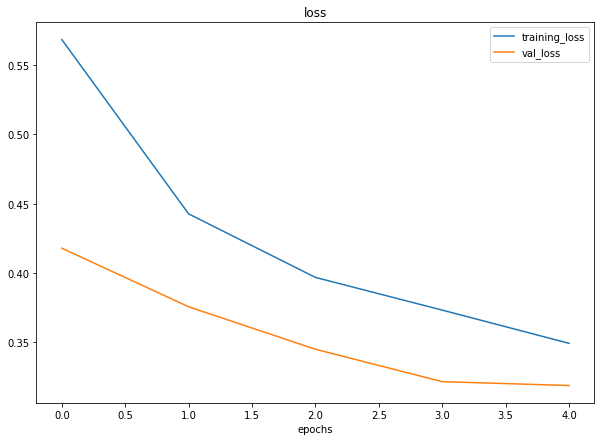

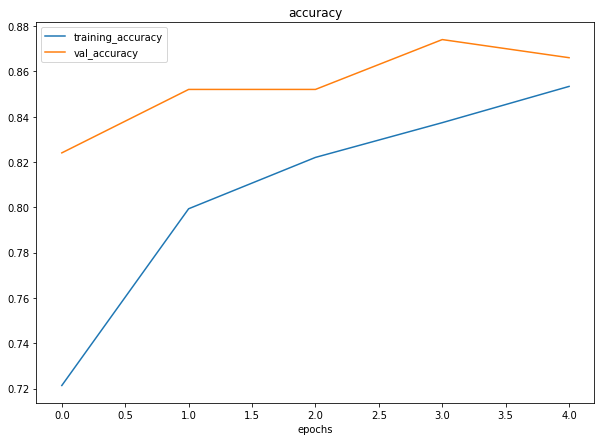

In [ ]:
#lets plot loss curves

plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

# lets do data augmentation

In [ ]:
# creating imagedatagenerator instance with data augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)
# create imagedatagenerator wihout data augmentation on train data
train_datagen = ImageDataGenerator(rescale=1/255.)

#create ImageDataGenerator without data augmentation for the test data

test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Lets visualize our augmentaed data
print("Augmented data")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle = False
)
# Create non-augmented train data batches
print("non-augmented test data batches")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary",
    shuffle=False)

#Create non-augmented test data batches
print("non-augmented test data batches")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"

)


Augmented data
Found 1500 images belonging to 2 classes.
non-augmented test data batches
Found 1500 images belonging to 2 classes.
non-augmented test data batches
Found 500 images belonging to 2 classes.


In [ ]:

# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 24


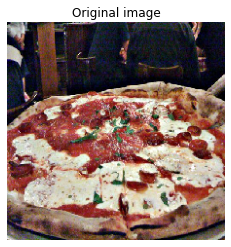

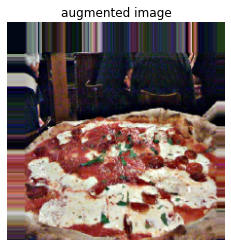

In [ ]:
from tensorflow.python.ops.gen_random_index_shuffle_ops import random_index_shuffle
#showing original image and augmented image

import random
random_number=random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented image")
plt.axis(False);

In [ ]:
# lets see how our model works on augmented data

# Create the model
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])


# Compile model (same as model_5)
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 485ms/step - loss: 0.7026 - accuracy: 0.4807 - val_loss: 0.6745 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6862 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6735 - accuracy: 0.6227 - val_loss: 0.6534 - val_accuracy: 0.5300
Epoch 4/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6662 - accuracy: 0.5953 - val_loss: 0.6153 - val_accuracy: 0.6820
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.7039 - accuracy: 0.5033 - val_loss: 0.6500 - val_accuracy: 0.6720


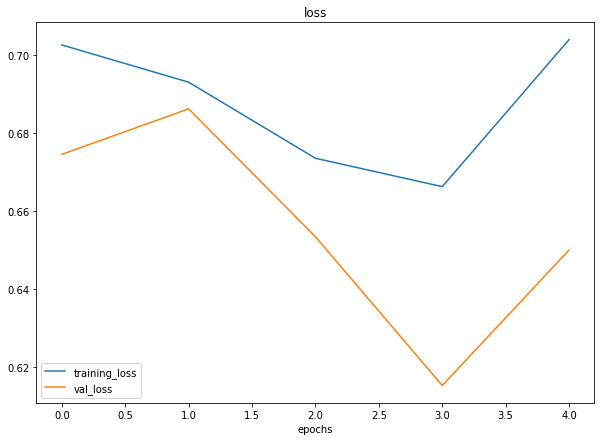

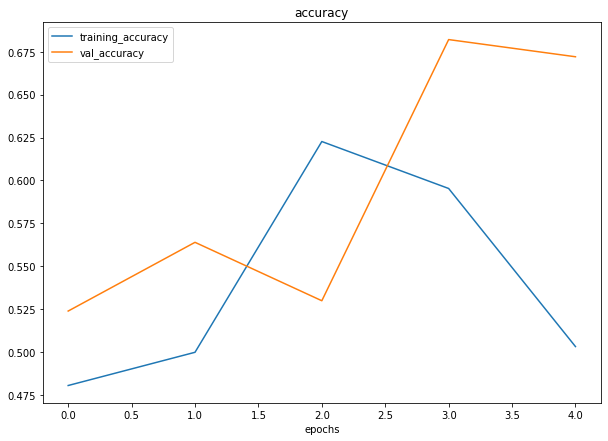

In [ ]:
# check our model training curves
plot_loss_curves(history_6)

In [ ]:
# lets shuffle our augmented training data and biult another model

train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [ ]:
# lets see how our model works on shuffled augmented data

# Create the model
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])


# Compile model (same as model_5)
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.6728 - accuracy: 0.5900 - val_loss: 0.5400 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6173 - accuracy: 0.6767 - val_loss: 0.4758 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5637 - accuracy: 0.7140 - val_loss: 0.5216 - val_accuracy: 0.7000
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5325 - accuracy: 0.7360 - val_loss: 0.4256 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5202 - accuracy: 0.7500 - val_loss: 0.3815 - val_accuracy: 0.8400


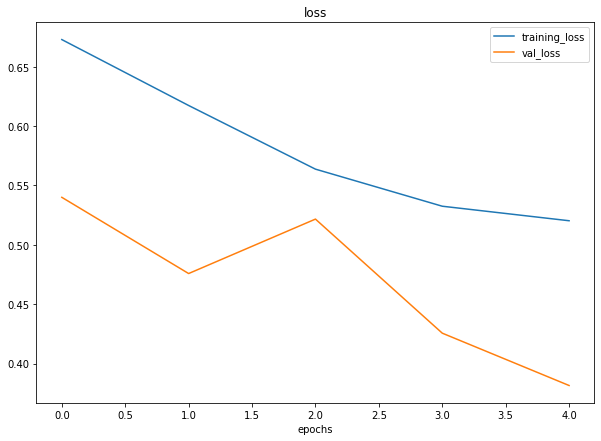

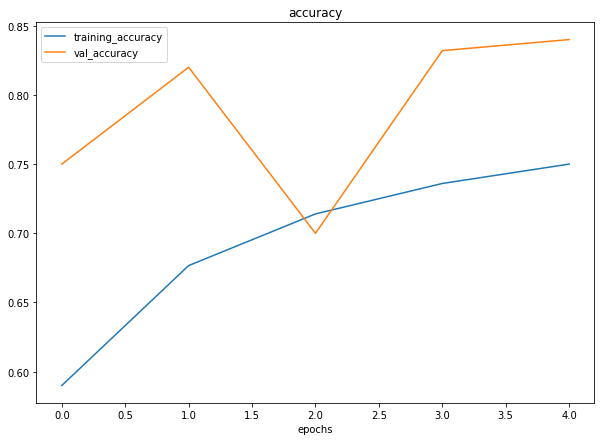

In [ ]:
#plot loss curves
plot_loss_curves(history_7)

# Making predictions on custom data

In [ ]:
# getting the classes we are working with
print(class_names)

['pizza' 'steak']


--2023-02-03 15:21:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-02-03 15:21:44 (33.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



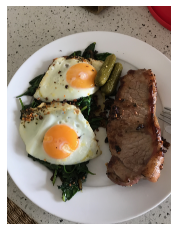

In [ ]:
#view our custom image image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
import tensorflow as tf

# lets create a function

def load_and_prep_image(filename, img_shape=224):
  # Reading the image
  img = tf.io.read_file(filename)

  #decode the read file into tensor....turning our image into tensor
  img = tf.image.decode_image(img)

  # resize the img

  img = tf.image.resize(img, size=[img_shape, img_shape])

  #rescale the img

  img = img/225

  return img



In [ ]:
# calling our function

steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
# now making predictions
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 211ms/step


array([[0.80779696]], dtype=float32)

In [ ]:
# lets get the name of class form our probability

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

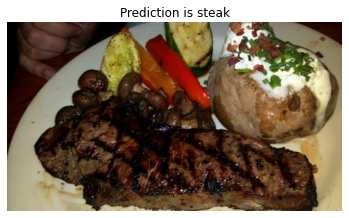

In [ ]:
# lets create the function

def pred_and_plot(model,filename,class_names=class_names):

# lets import the target image
  img = load_and_prep_image(filename)

# make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

# get the predicted class

  pred_class = class_names[int(tf.round(pred))]

# plot the image and predicted class

plt.imshow(img)
plt.title(f"Prediction is {pred_class}")
plt.axis(False);





In [ ]:
# test our model on custom image

pred_and_plot(model_7,"03-steak.jpeg",class_names)


1/1 [==============================] - 0s 15ms/step


In [ ]:
# lets download another custom image and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2023-02-03 15:21:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-02-03 15:21:47 (42.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
pred_and_plot(model_7,"03-pizza-dad.jpeg",class_names)

1/1 [==============================] - 0s 19ms/step


# lets do multi-class classification model

In [ ]:
# importing our data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-02-03 15:21:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.211.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   203MB/s    in 2.4s    

2023-02-03 15:21:50 (203 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# unzip our data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# lets check our data
import os

for dirpath, dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/test
there are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data/test/steak
there are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are 10 directories and 0 images in 10_fo

In [ ]:
# lets setup test and train directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# getting class names without using imgdatagenerator

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape:(512, 512, 3)


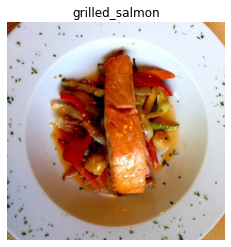

In [ ]:
#lets visualize our data

import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

# lets process our data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale our image
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# load data in from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# lets create CNN model

In [ ]:
# import models

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool1D,Dense, Flatten, Activation


#creating model

model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,2,activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#compiling model

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# fit the model

history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 211ms/step - loss: 2.1501 - accuracy: 0.2071 - val_loss: 2.0212 - val_accuracy: 0.2676
Epoch 2/5
235/235 [==============================] - 51s 219ms/step - loss: 1.8074 - accuracy: 0.3853 - val_loss: 1.8254 - val_accuracy: 0.3572
Epoch 3/5
235/235 [==============================] - 60s 254ms/step - loss: 1.3227 - accuracy: 0.5632 - val_loss: 2.0298 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 51s 219ms/step - loss: 0.6904 - accuracy: 0.7765 - val_loss: 2.6147 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 0.2239 - accuracy: 0.9356 - val_loss: 4.0873 - val_accuracy: 0.2776


In [ ]:
# evaluate the model on test data

model_8.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 3.0693 - accuracy: 0.2672


[3.0692927837371826, 0.2671999931335449]

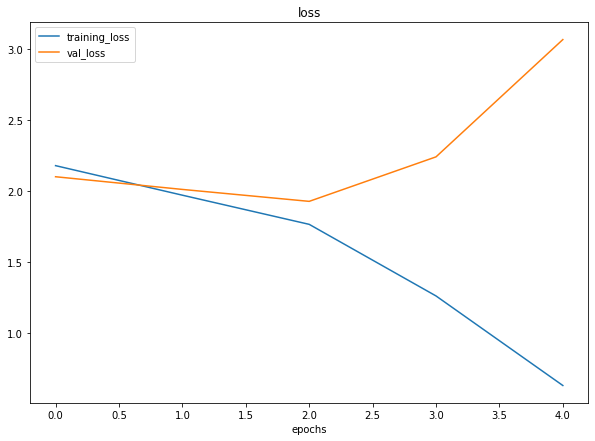

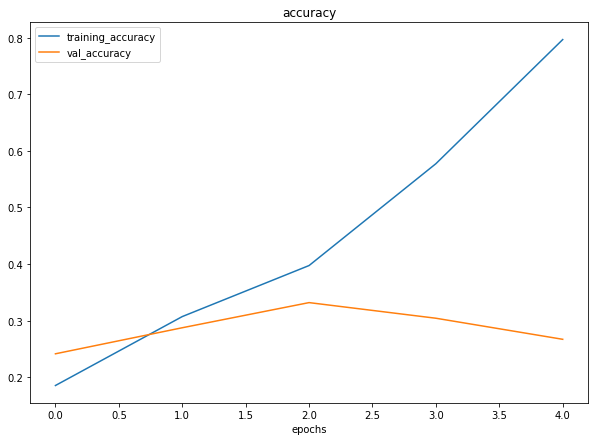

In [ ]:
# checking loss curves
plot_loss_curves(history_8)

In [ ]:
# getting model 8 summary
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      410       
                                                                 
 conv2d_22 (Conv2D)          (None, 107, 107, 10)      910       
                                                      

# lets simpilify our model by removing layers

In [ ]:
# create the model

model_9 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

# compile the model

model_9.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 191ms/step - loss: 2.1658 - accuracy: 0.2203 - val_loss: 1.9864 - val_accuracy: 0.3032
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.7455 - accuracy: 0.4045 - val_loss: 1.8833 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 62s 265ms/step - loss: 1.3022 - accuracy: 0.5763 - val_loss: 2.0183 - val_accuracy: 0.3204
Epoch 4/5
235/235 [==============================] - 67s 285ms/step - loss: 0.7912 - accuracy: 0.7599 - val_loss: 2.3182 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 73s 311ms/step - loss: 0.4151 - accuracy: 0.8900 - val_loss: 2.7695 - val_accuracy: 0.2988


In [ ]:
# getting summary

model_9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_15 (Dense)            (None, 10)              

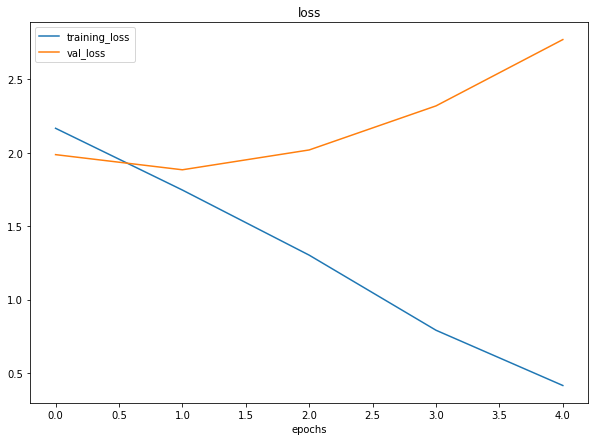

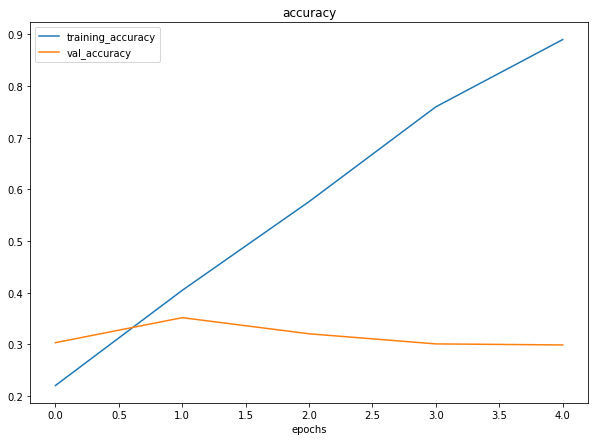

In [ ]:
# getting loss curves

plot_loss_curves(history_9)

# lets try data augmentation, as our model is not improving and preforming bad

In [ ]:
#creating an augmented data generator Instance
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.


# lets create a clone model of model-8

In [ ]:
#clonning the model
model_10 = tf.keras.models.clone_model(model_8)

# compiling the cloned model

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fitting the model

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 518ms/step - loss: 2.2141 - accuracy: 0.1849 - val_loss: 2.0923 - val_accuracy: 0.2320
Epoch 2/5
235/235 [==============================] - 123s 523ms/step - loss: 2.1033 - accuracy: 0.2388 - val_loss: 1.9850 - val_accuracy: 0.2744
Epoch 3/5
235/235 [==============================] - 143s 608ms/step - loss: 2.0492 - accuracy: 0.2693 - val_loss: 1.9368 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 167s 710ms/step - loss: 2.0188 - accuracy: 0.2865 - val_loss: 1.8900 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 158s 673ms/step - loss: 1.9970 - accuracy: 0.2964 - val_loss: 1.8628 - val_accuracy: 0.3524


In [ ]:
#plotting loss curves
plot_loss_curves(history_10)

## its seems that our model is not improving and not performing well....lets get some custom images and chk our model

In [ ]:
# downloading our images

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-02-03 16:52:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2023-02-03 16:52:44 (28.1 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2023-02-03 16:52:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [ ]:
# creating function to view our images

def pred_and_plot(model, filename,class_names=class_names):

  # import the target image and preprocess it

  img = load_and_prep_image(filename, img_shape=224)

  # make prediction

  Pred = model.predict(tf.expand_dims(img,axis=0))

  # adding logic for multiclass

  if len(Pred[0])>1:
    pred_class = class_names[tf.argmax(Pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #ploting image and predicted class

  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


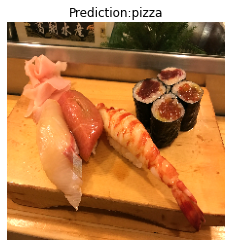

In [ ]:
# lets call our function

pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names = class_names)

# saving and loading our model

In [ ]:
# saving model
model_10.save("saved_tarined_model_10")

In [ ]:
# loading our saved model

loaded_model_10 = tf.keras.models.load_model("saved_tarined_model_10")



In [ ]:

# evaluating our model

loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 1.8628 - accuracy: 0.3524


[1.862804651260376, 0.352400004863739]